In [ ]:
#Importing Libraries 
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd # to Display learning curves 
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import seaborn as sns 
##Muti-Classification metrics 
from sklearn import metrics
from sklearn.metrics import  confusion_matrix
#to display ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# for clasification report
from sklearn.metrics import classification_report

%matplotlib inline


In [ ]:
# Loading the CIFAR-10 dataset pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#Normalizing all the train and test images by dividing with 255
x_train = x_train.astype('float32') / 255 
x_test = x_test.astype('float32') / 255


In [ ]:
#Saving the original values of labels in other variables before applying one hot encoder
y_tr_org = np.copy(y_train)
y_tst_org = np.copy(y_test)


In [ ]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

50000 train set
10000 test set


In [ ]:
#Building Classfifier model with 2D CNN with sequential API
model = keras.models.Sequential() #sequential API

# Layer #1 32 neurons
model.add(keras.layers.Conv2D(filters=32, kernel_size= (3,3), padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))

# Layer #2 64 neurons
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) 

# Layer #3 128 neurons
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) 

#Flatten layer is followed by a fully connected layer with 128 neurons
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
#Compiling the model using categorical crossentropy loss
# Optimizer used is RMSprop, with a learning rate of 0.0001 
opt = keras.optimizers.RMSprop(learning_rate=0.0001) 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Training the model with batch_size=128, epochs=100. 

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("cifar10.h5", save_best_only=True) 

history= model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=100,
         validation_data=(x_test, y_test),
         callbacks=[checkpoint])

Epoch 1/100
391/391 [==============================] - 20s 24ms/step - loss: 1.9821 - accuracy: 0.2801 - val_loss: 1.7262 - val_accuracy: 0.4026
Epoch 2/100
391/391 [==============================] - 8s 21ms/step - loss: 1.7122 - accuracy: 0.3881 - val_loss: 1.5738 - val_accuracy: 0.4522
Epoch 3/100
391/391 [==============================] - 8s 21ms/step - loss: 1.5991 - accuracy: 0.4240 - val_loss: 1.5441 - val_accuracy: 0.4532
Epoch 4/100
391/391 [==============================] - 8s 21ms/step - loss: 1.5224 - accuracy: 0.4535 - val_loss: 1.4044 - val_accuracy: 0.5041
Epoch 5/100
391/391 [==============================] - 8s 21ms/step - loss: 1.4662 - accuracy: 0.4746 - val_loss: 1.3571 - val_accuracy: 0.5179
Epoch 6/100
391/391 [==============================] - 8s 22ms/step - loss: 1.4137 - accuracy: 0.4966 - val_loss: 1.3772 - val_accuracy: 0.5119
Epoch 7/100
391/391 [==============================] - 8s 21ms/step - loss: 1.3676 - accuracy: 0.5140 - val_loss: 1.2733 - val_accuracy

In [ ]:
# Displaying the learning curves
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 100, 'steps': 391}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


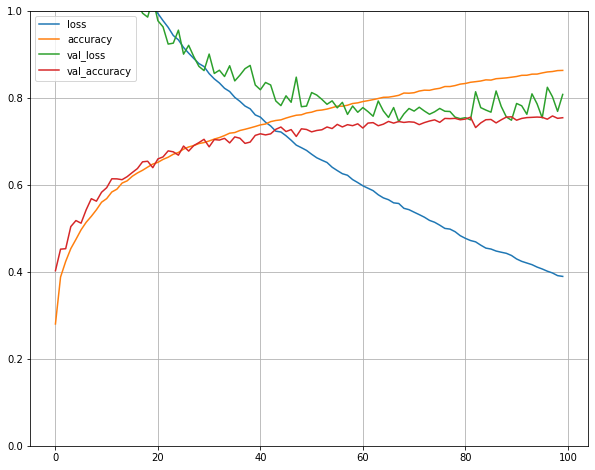

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The model is overfitting because as it can be observed in the plot, the loss in training (line blue) is going down meanwhile on validation (line green) is not going down.
Additionally the accuracy in training is higher than in validation/ test 

In [ ]:
#saving model
model.save("CNN_cifar10_clf.h5") 
model.save_weights("CNN_cifar10_weights.ckpt") 


Evaluating the model on test data using several evaluation metrics such as accuracy, precision, and recall. 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8079641461372375
Test accuracy: 0.7544000148773193


In [ ]:
# Muti-Classification metrics using Confusion Matrix
pred_all = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_tst_org, pred_all)
cm 

array([[800,  16,  67,   8,  14,   2,  13,   8,  48,  24],
       [ 20, 884,  15,   5,   2,   1,  12,   1,  15,  45],
       [ 41,   5, 772,  34,  47,  26,  46,  20,   7,   2],
       [ 23,  12, 129, 517,  56, 115,  78,  41,  15,  14],
       [ 16,   4, 117,  28, 687,  22,  53,  62,   9,   2],
       [ 13,   8, 102, 143,  40, 599,  31,  54,   6,   4],
       [  8,   3,  55,  32,  15,  14, 861,   3,   7,   2],
       [ 17,   4,  46,  26,  53,  39,  13, 791,   2,   9],
       [ 56,  32,  19,   8,   2,   5,   8,   0, 856,  14],
       [ 41,  97,  17,  11,   2,   5,  11,  15,  24, 777]])

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_tst_org, pred_all, target_names=['0', '1', '2','3','4','5','6','7','8','9']))


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1000
           1       0.83      0.88      0.86      1000
           2       0.58      0.77      0.66      1000
           3       0.64      0.52      0.57      1000
           4       0.75      0.69      0.72      1000
           5       0.72      0.60      0.66      1000
           6       0.76      0.86      0.81      1000
           7       0.79      0.79      0.79      1000
           8       0.87      0.86      0.86      1000
           9       0.87      0.78      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



Making a comparison of AUC values for each class depicted through a ROC graph. 

ROC curve for individual classes

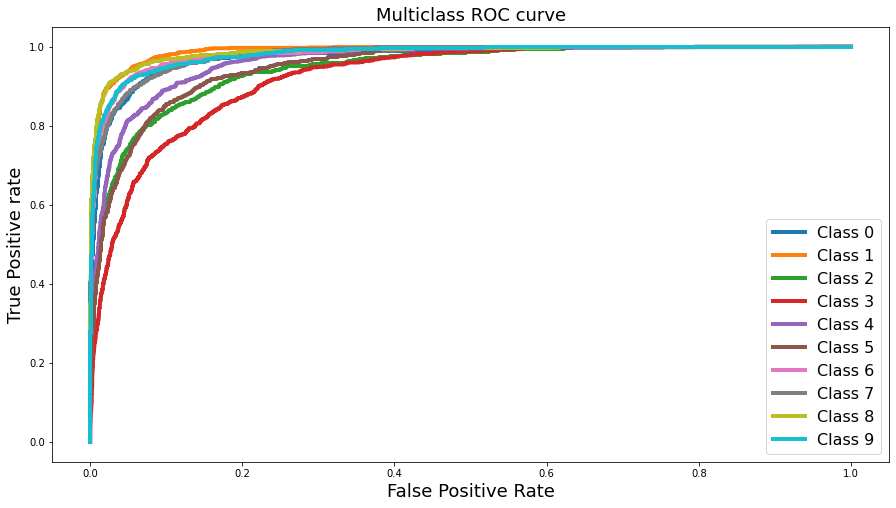

In [ ]:
fpr = {}
tpr = {}
thres ={}
n_class = 10

pred_prob = model.predict(x_test) #prediction of the probabilities for each class

for i in range(n_class): # iteration through the classes 
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i) #Calling the roc_curve function

#Setting the figure size
figure = plt.figure(figsize=(15, 8))
# Plotting    
plt.plot(fpr[0], tpr[0],linewidth = 4, label='Class 0')
plt.plot(fpr[1], tpr[1],linewidth = 4,label='Class 1')
plt.plot(fpr[2], tpr[2],linewidth = 4,label='Class 2')
plt.plot(fpr[3], tpr[3],linewidth = 4,label='Class 3')
plt.plot(fpr[4], tpr[4],linewidth = 4, label='Class 4')
plt.plot(fpr[5], tpr[5],linewidth = 4, label='Class 5')
plt.plot(fpr[6], tpr[6],linewidth = 4,label='Class 6')
plt.plot(fpr[7], tpr[7],linewidth = 4,label='Class 7')
plt.plot(fpr[8], tpr[8],linewidth = 4,label='Class 8')
plt.plot(fpr[9], tpr[9],linewidth = 4, label='Class 9')

plt.title('Multiclass ROC curve',fontsize = 18)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive rate',fontsize = 18)
plt.legend(loc='best',fontsize = 16)

plt.show() #Displaying the plot

the Auc is different for the classes. the class 3 whose line is in the dark red has a lower probability of prediction and the class 1 has the best prediction. 